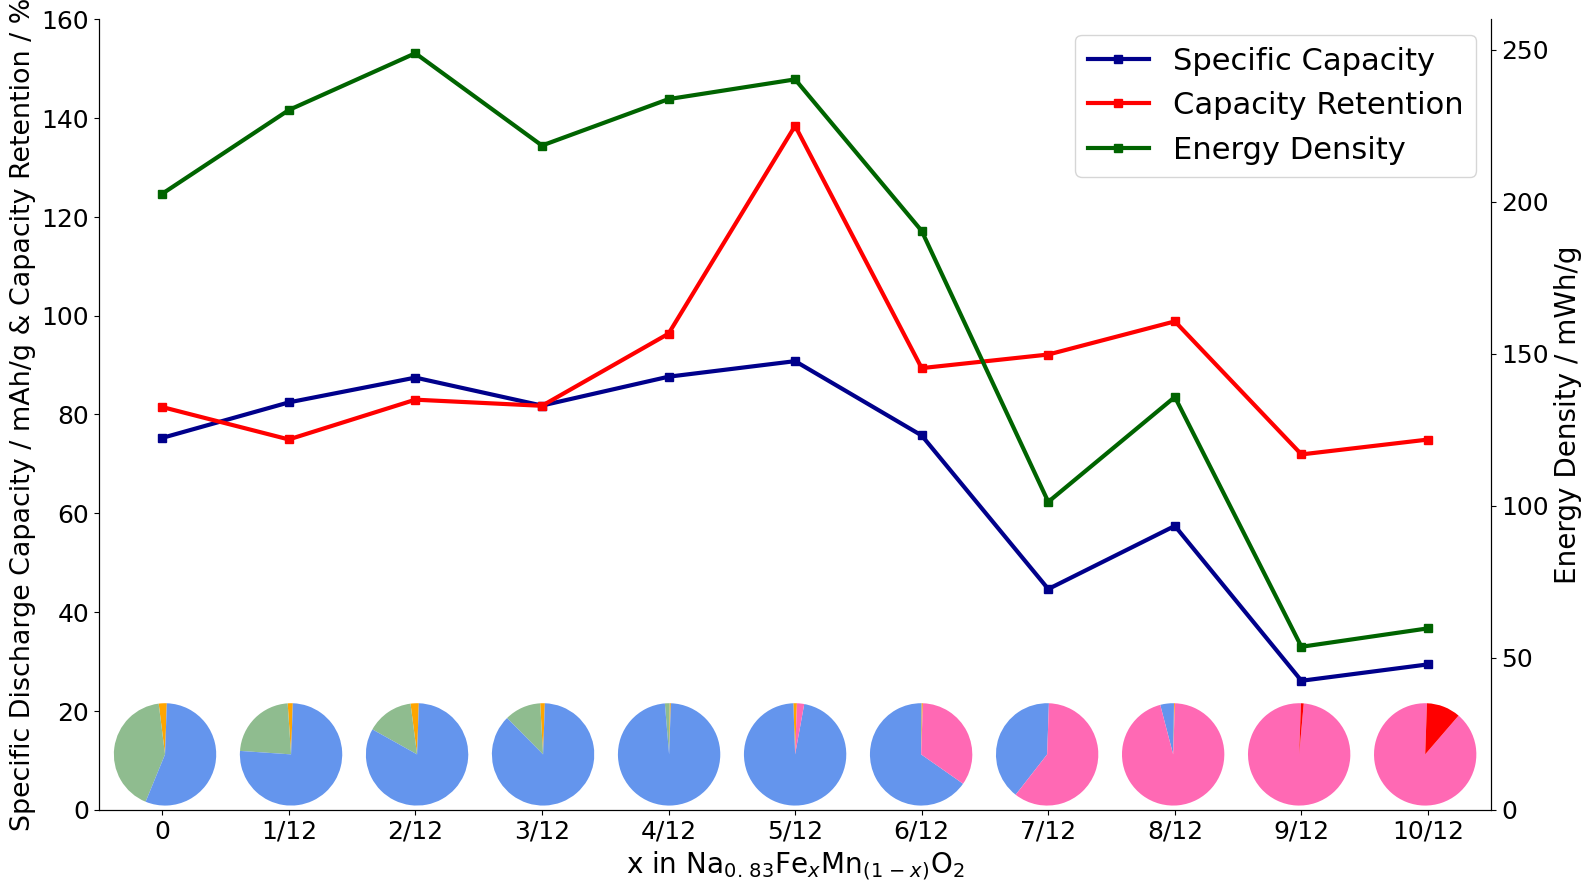

In [235]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np

X_AXIS = ('0', '1/12', '2/12', '3/12', '4/12', '5/12', '6/12', '7/12', '8/12', '9/12', '10/12')

custom_colors = {
    'P2': 'cornflowerblue',
    'O3$_m$$_o$$_n$': 'darkseagreen',
    'O3$_o$$_r$$_t$$_h$': 'hotpink',
    'Na$_2$WO$_4$': 'orange',
    'β-NaFeO$_2$': 'red',
}

data = [
    {
        'data': {
            'Na$_2$WO$_4$': (2.54, 1.61, 2.6, 1.46, 0.41, 1.11, 0.45, 0, 0.29, 0, 0),
            'O3$_m$$_o$$_n$': (41.82, 22.86, 14.84, 11.53, 1.47, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0),
            'P2': (55.64, 75.53, 82.56, 87, 98.12, 96.59, 65.39, 40.01, 4.33, 0, 0),
            'O3$_o$$_r$$_t$$_h$': (0.0, 0.0, 0.0, 0.0, 0.0, 2.3, 34.16, 59.99, 95.38, 99.13, 89.24),
            'β-NaFeO$_2$': (0, 0, 0, 0, 0, 0, 0, 0, 0, 0.87, 10.76),
        },
        'specific_capacity': {
            '0/12': 75.26,
            '1/12': 82.45,
            '2/12': 87.47,
            '3/12': 81.81,
            '4/12': 87.65,
            '5/12': 90.8,
            '6/12': 75.75,
            '7/12': 44.67,
            '8/12': 57.45,
            '9/12': 26.1,
            '10/12': 29.42,
        },
        'energy_density': {
            '0/12': 202.6,
            '1/12': 230.14,
            '2/12': 248.83,
            '3/12': 218.47,
            '4/12': 233.74,
            '5/12': 240.23,
            '6/12': 190.39,
            '7/12': 101.26,
            '8/12': 135.77,
            '9/12': 53.6,
            '10/12': 59.66,
        },
        'capacity_retention': {
            '0/12': 81.51,
            '1/12': 74.95,
            '2/12': 83.0,
            '3/12': 81.76,
            '4/12': 96.36,
            '5/12': 138.43,
            '6/12': 89.39,
            '7/12': 92.14,
            '8/12': 98.85,
            '9/12': 71.92,
            '10/12': 74.93,
        }
    },
]

fig, ax = plt.subplots(1, 1, figsize=(16, 9))

data_legend_elements = [Patch(facecolor=color, edgecolor='white', label=label) for label, color in custom_colors.items()]

specific_capacity_line = ax.plot([], [], color='darkblue', marker='s', linestyle='-', label='Specific Capacity', linewidth=3)[0]
capacity_retention_line = ax.plot([], [], color='red', marker='s', linestyle='-', label='Capacity Retention', linewidth=3)[0]

ax2 = ax.twinx()
energy_density_line = ax2.plot([], [], color='darkgreen', marker='s', linestyle='-', label='Energy Density', linewidth=3)[0]

lines = [specific_capacity_line, capacity_retention_line, energy_density_line]

for i, entry in enumerate(data):
    specific_capacity_values = list(entry['specific_capacity'].values())
    energy_density_values = list(entry['energy_density'].values())
    capacity_retention_values = list(entry['capacity_retention'].values())

    specific_capacity_line.set_data(np.arange(len(specific_capacity_values)), specific_capacity_values)
    capacity_retention_line.set_data(np.arange(len(capacity_retention_values)), capacity_retention_values)
    energy_density_line.set_data(np.arange(len(energy_density_values)), energy_density_values)

data_legend = ax.legend(handles=data_legend_elements, loc='center right', bbox_to_anchor=(1.35, 0.5), fontsize=20)
ax2_legend = ax2.legend(lines, ['Specific Capacity', 'Capacity Retention', 'Energy Density'], loc='upper right', bbox_to_anchor=(1, 1), fontsize=22)

ax.add_artist(data_legend)  # Add data legend back to the plot

ax2.set_xlabel('Cycles', fontsize=14)
ax.set_ylabel('Specific Discharge Capacity / mAh/g & Capacity Retention / %', fontsize=19.4)
ax2.set_ylabel('Energy Density / mWh/g', fontsize=20)
ax.set_xlabel('x in Na$_0$$_.$$_8$$_3$Fe$_x$Mn$_($$_1$$_-$$_x$$_)$O$_2$', fontsize=20)

ax.set_xticks(np.arange(len(X_AXIS)))
ax.set_xticklabels(X_AXIS)
ax.set_xlim(-0.5, len(X_AXIS) - 0.5)
ax.set_ylim(0, 160)
ax2.set_ylim(0, 260)
ax.grid(axis='y', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)

for j, x_value in enumerate(range(len(X_AXIS))):
        pie_data = [entry['data'][key][j] for key in entry['data'].keys()]  # Access data for the current cycle index (j)
        ax_pie = ax.inset_axes([0.01 + j*0.0905, 0.01, 0.075, 0.12])
        ax_pie.pie(pie_data, startangle=88, radius=1.37, colors=[custom_colors[key] for key in entry['data'].keys()])
        ax_pie.set_aspect('equal', adjustable='datalim')

plt.subplots_adjust(wspace=0.2)
plt.tight_layout(pad=1)
ax.grid(False)  # Remove grid lines
ax.spines['top'].set_visible(False) 
ax2.spines['top'].set_visible(False)  # Remove top spine
# Remove top spine



output_file = "/Users/harryfyjis-walker/Desktop/Part II Stuff/figures/282552822Piecharts.pdf"
plt.savefig(output_file, bbox_inches='tight', dpi=300, format='pdf')
plt.show()
